<a href="https://colab.research.google.com/github/nikhil1014/Image-Classifier-Cat-Dog-/blob/master/CNN_(Cat_%26_Dog).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing from drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/CNN/Cat & Dog")
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/CNN/Cat & Dog'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_path="/content/gdrive/My Drive/Colab Notebooks/CNN/Cat & Dog/training_set"
test_path="/content/gdrive/My Drive/Colab Notebooks/CNN/Cat & Dog/test_set"

In [0]:
#Data Augmentation
train_datagen = ImageDataGenerator(rotation_range=90,width_shift_range=0.2,height_shift_range=0.2,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [8]:
train_batches = train_datagen.flow_from_directory(train_path,target_size=(48,48),classes=['dogs','cats'],batch_size=64)
test_batches= test_datagen.flow_from_directory(test_path,target_size=(48,48), classes=['dogs','cats'],batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [0]:
#train_datagen.fit(train_batches, augment=True)
#test_datagen.fit(test_batches, augment=True)

In [0]:
#Every unique batches of train_images
imgs_train,labels_train=next(train_batches)

In [10]:
print('imgs_train shape:', imgs_train.shape)
print('labels_train shape:', labels_train.shape)
print(imgs_train.shape[0], 'train samples')

imgs_train shape: (64, 48, 48, 3)
labels_train shape: (64, 2)
64 train samples


**Visualization of training and test dataset**

In [0]:
def plots(ims,figsize=(30,15),rows=1,interp=False,titles=None):
  if type(ims[0]) is np.ndarray:
     ims=np.array(ims).astype(np.uint8)
     if (ims.shape[-1]!=3):
         ims=ims.transpose((0,2,3,1))
  f=plt.figure(figsize=figsize)
  cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
  for i in range(len(ims)):
      sp=f.add_subplot(rows,cols,i+1)
      sp.axis('Off')
      if titles is not None:
         sp.set_title(titles[i],fontsize=16)
      plt.imshow(ims[i],interpolation=None if interp else 'none')   

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


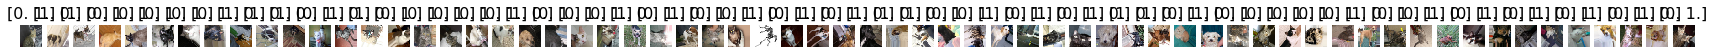

In [0]:
plots(imgs_train,titles=labels_train)

In [0]:
#Every unique batches of test_images
imgs_test,labels_test=next(test_batches)

In [12]:
print('imgs_test shape:', imgs_test.shape)
print('labels_test shape:', labels_test.shape)
print(imgs_test.shape[0], 'test samples')

imgs_test shape: (32, 48, 48, 3)
labels_test shape: (32, 2)
32 test samples


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


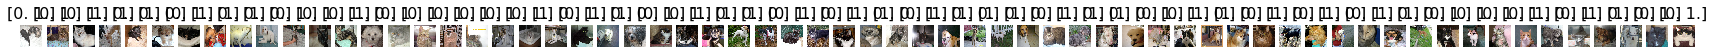

In [0]:
plots(imgs_test,titles=labels_test)

**Importing Libraries**

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.optimizers import *
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
%matplotlib inline

**CNN Model**

In [0]:
model=Sequential()
model.add(Conv2D(128,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu',input_shape=(48,48,3))),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),padding='same')),
model.add(Dropout(0.2)),

model.add(Conv2D(128,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),

model.add(Conv2D(128,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),
model.add(MaxPooling2D(pool_size=(2,2),padding='same')),

model.add(Conv2D(64,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),

model.add(Conv2D(64,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),padding='same')),
model.add(Dropout(0.2)),

model.add(Conv2D(36,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),

model.add(Conv2D(32,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),padding='same')),
model.add(Dropout(0.2)),

model.add(Conv2D(32,(3,3),kernel_regularizer=l2(0.01),strides=(2,2),padding='same',activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.2)),

model.add(Flatten()),
model.add(Dense(2,activation='relu')),
model.add(Dense(2,activation='sigmoid'))   

In [16]:
#Model Compiling
model.compile(Adam(lr=.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 128)       3584      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 128)         147584    
_________________________________________________________________
batch_normalization_10 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 128)      

In [0]:
model.fit(imgs_train,labels_train,validation_data=(imgs_test,labels_test),epochs=500,verbose=1)

In [24]:
train_loss, train_acc = model.evaluate(imgs_train,labels_train)
train_acc, train_loss

64/64 [==============================] - 0s 263us/step


(0.96875, 0.44143685698509216)

In [19]:
test_loss, test_acc = model.evaluate(imgs_test,labels_test)
test_acc, test_loss

32/32 [==============================] - 0s 287us/step


(0.46875, 1.7609853744506836)

**Predicting on test data**

In [20]:
preds=model.predict(imgs_test)
preds.shape

(32, 2)

In [0]:
preds

In [22]:
#Converting predictions to string
y_pred=(preds>0.5)
y_pred

array([[False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False]])